In [1]:
import dask.bag as db
import dask.dataframe as dd
import pandas as pd
import json

import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap

# Set iPython to display visualization inline
%matplotlib inline


In [1]:
#df = pd.read_json('yelp_academic_dataset_business.json')

js = db.from_filenames('Data/yelp_academic_dataset_business.json').map(json.loads)
df = js.to_dataframe()
print(js.take(2))
rlongs = js.pluck('longitude')
rlats = js.pluck('latitude')
longs = []
lats = []
for a in rlongs:
    longs.append(a)   
for b in rlats:
    lats.append(b)
    
# read the entire file into a python array
with open('Data/yelp_academic_dataset_business.json', 'rb') as f:
   data = f.readlines()

# remove the trailing "\n" from each line
data = map(lambda x: x.rstrip().decode("utf-8"), data)

# each element of 'data' is an individual JSON object.
# i want to convert it into an *array* of JSON objects
# which, in and of itself, is one large JSON object
# basically... add square brackets to the beginning
# and end, and have all the individual business JSON objects
# separated by a comma
#print(data[0])
data_json_str = "[" + ','.join(data) + "]"

# now, load it into pandas
dfpanda = pd.read_json(data_json_str)





({'open': True, 'longitude': -79.9007057, 'business_id': '5UmKMjUEUNdYWqANhGckJw', 'latitude': 40.3543266, 'categories': ['Fast Food', 'Restaurants'], 'full_address': '4734 Lebanon Church Rd\nDravosburg, PA 15034', 'state': 'PA', 'name': 'Mr Hoagie', 'review_count': 4, 'stars': 4.5, 'neighborhoods': [], 'hours': {'Thursday': {'open': '11:00', 'close': '21:00'}, 'Monday': {'open': '11:00', 'close': '21:00'}, 'Friday': {'open': '11:00', 'close': '21:00'}, 'Tuesday': {'open': '11:00', 'close': '21:00'}, 'Wednesday': {'open': '11:00', 'close': '21:00'}}, 'attributes': {'Delivery': False, 'Good For Groups': True, 'Take-out': True, 'Alcohol': 'none', 'Accepts Credit Cards': True, 'Parking': {'lot': False, 'street': False, 'garage': False, 'valet': False, 'validated': False}, 'Caters': False, 'Good for Kids': True, 'Attire': 'casual', 'Waiter Service': False, 'Good For': {'dinner': False, 'breakfast': False, 'dessert': False, 'lunch': False, 'latenight': False, 'brunch': False}, 'Noise Level'

In [3]:
dfpanda.head(5)

attributes             business_id  \
0  {'Accepts Credit Cards': True, 'Drive-Thru': F...  5UmKMjUEUNdYWqANhGckJw   
1  {'Accepts Credit Cards': True, 'Happy Hour': T...  UsFtqoBl7naz8AVUBZMjQQ   
2                                                 {}  3eu6MEFlq2Dg7bQh8QbdOg   
3                            {'Good for Kids': True}  cE27W9VPgO88Qxe4ol6y_g   
4  {'Parking': {'valet': False, 'validated': Fals...  HZdLhv6COCleJMo7nPl-RA   

                                          categories         city  \
0                           [Fast Food, Restaurants]   Dravosburg   
1                                        [Nightlife]   Dravosburg   
2                          [Auto Repair, Automotive]   Dravosburg   
3                     [Active Life, Mini Golf, Golf]  Bethel Park   
4  [Shopping, Home Services, Internet Service Pro...   Pittsburgh   

                                    full_address  \
0   4734 Lebanon Church Rd\nDravosburg, PA 15034   
1           202 McClure St\nDravosburg, PA 15034   
2              1 Ravine St\nDravosburg, PA 15034   
3        1530 Hamilton Rd\nBethel Park, PA 15234   
4  301 South Hills Village\nPittsburgh, PA 15241   

                                               hours   latitude  longitude  \
0  {'Thursday': {'open': '11:00', 'close': '21:00...  40.354327 -79.900706   
1                                                 {}  40.350553 -79.886814   
2                                                 {}  40.350956 -79.889059   
3                                                 {}  40.354115 -80.014660   
4  {'Monday': {'open': '10:00', 'close': '21:00'}...  40.357620 -80.059980   

                       name neighborhoods   open  review_count  stars state  \
0                 Mr Hoagie            []   True             4    4.5    PA   
1              Clancy's Pub            []   True             4    3.5    PA   
2          Joe Cislo's Auto            []   True             3    5.0    PA   
3  Cool Springs Golf Center            []  False             5    2.5    PA   
4                   Verizon            []   True             5    2.5    PA   

       type  
0  business  
1  business  
2  business  
3  business  
4  business


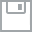
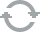
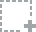
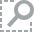
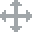
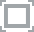
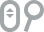
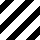
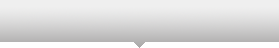
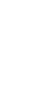
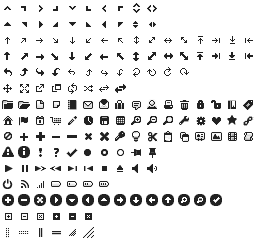
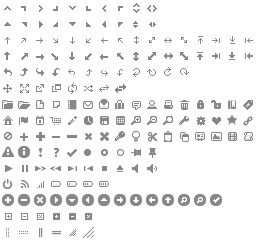
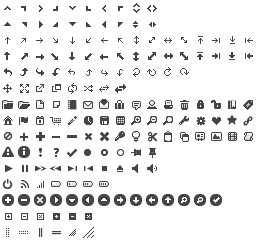
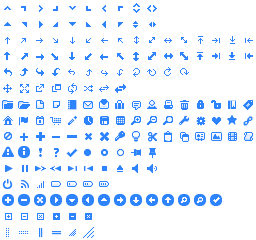
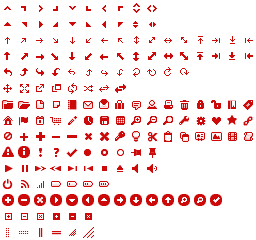
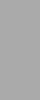
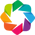
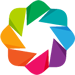

In [4]:
from bokeh.plotting import figure, output_notebook, show

output_notebook()

x_range=(-18000000,18000000)
y_range=(-18000000,18000000)

def base_plot(tools='pan,wheel_zoom,reset',webgl=False):
    p = figure(tools=tools, plot_width=900, plot_height=600,
        x_range=x_range, y_range=y_range, outline_line_color=None,
        min_border=0, min_border_left=0, min_border_right=0,
        min_border_top=0, min_border_bottom=0, webgl=webgl)
    
    p.axis.visible = False
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None
    return p
options = dict(line_color=None, fill_color='blue', size=5)

In [5]:
from bokeh.io import output_file
from bokeh.models import (
  GMapPlot, GMapOptions, ColumnDataSource, Circle, DataRange1d, PanTool, WheelZoomTool, BoxSelectTool
)

map_options = GMapOptions(lat=30.29, lng=-97.73, map_type="roadmap", zoom=5)

plot = GMapPlot(
    x_range=DataRange1d(), y_range=DataRange1d(), map_options=map_options, title="US"
)

def getSource(coordList):
    source = ColumnDataSource(
        data=dict(
            lat=[i[0] for i in coordList],
            lon=[i[1] for i in coordList],
        )
    )
    return source


ratings = js.pluck('stars')
good = []
avg = []
bad = []
for idx, r in enumerate(ratings):
    if r >= 3.5:
        good.append((lats[idx], longs[idx]))
    elif r >= 2.5:
        avg.append((lats[idx], longs[idx]))
    else:
        bad.append((lats[idx], longs[idx]))

goodRev = Circle(x="lon", y="lat", size=2, fill_color="green", fill_alpha=0.1, line_color=None)
avgRev = Circle(x="lon", y="lat", size=2, fill_color="yellow", fill_alpha=0.1, line_color=None)
badRev = Circle(x="lon", y="lat", size=2, fill_color="red", fill_alpha=0.1, line_color=None)

plot.add_glyph(getSource(good), goodRev)
plot.add_glyph(getSource(avg), avgRev)
plot.add_glyph(getSource(bad), badRev)

plot.add_tools(PanTool(), WheelZoomTool(), BoxSelectTool())
output_file("gmap_plot.html")
show(plot)

In [2]:
# read the entire file into a python array
with open('Data/yelp_academic_dataset_review.json', 'rb') as f:
   data = f.readlines()

# remove the trailing "\n" from each line
data = map(lambda x: x.rstrip().decode("utf-8"), data)

# each element of 'data' is an individual JSON object.
# i want to convert it into an *array* of JSON objects
# which, in and of itself, is one large JSON object
# basically... add square brackets to the beginning
# and end, and have all the individual business JSON objects
# separated by a comma
#print(data[0])
data_json_str = "[" + ','.join(data) + "]"

# now, load it into pandas
df_review = pd.read_json(data_json_str)

df_review.head(5)


business_id       date               review_id  stars  \
0  5UmKMjUEUNdYWqANhGckJw 2012-08-01  Ya85v4eqdd6k9Od8HbQjyA      4   
1  5UmKMjUEUNdYWqANhGckJw 2014-02-13  KPvLNJ21_4wbYNctrOwWdQ      5   
2  5UmKMjUEUNdYWqANhGckJw 2015-10-31  fFSoGV46Yxuwbr3fHNuZig      5   
3  UsFtqoBl7naz8AVUBZMjQQ 2013-11-08  Di3exaUCFNw1V4kSNW5pgA      5   
4  UsFtqoBl7naz8AVUBZMjQQ 2014-03-29  0Lua2-PbqEQMjD9r89-asw      3   

                                                text    type  \
0  Mr Hoagie is an institution. Walking in, it do...  review   
1  Excellent food. Superb customer service. I mis...  review   
2  Yes this place is a little out dated and not o...  review   
3  All the food is great here. But the best thing...  review   
4  We checked this place out this past Monday for...  review   

                  user_id                                 votes  
0  PUFPaY9KxDAcGqfsorJp3Q  {'cool': 0, 'funny': 0, 'useful': 0}  
1  Iu6AxdBYGR4A0wspR9BYHA  {'cool': 0, 'funny': 0, 'useful': 0}  
2  auESFwWvW42h6alXgFxAXQ  {'cool': 0, 'funny': 0, 'useful': 0}  
3  uK8tzraOp4M5u3uYrqIBXg  {'cool': 0, 'funny': 0, 'useful': 0}  
4  I_47G-R2_egp7ME5u_ltew  {'cool': 0, 'funny': 0, 'useful': 0}

In [3]:
# read the entire file into a python array
with open('Data/yelp_academic_dataset_tip.json', 'rb') as f:
   data = f.readlines()

# remove the trailing "\n" from each line
data = map(lambda x: x.rstrip().decode("utf-8"), data)

# each element of 'data' is an individual JSON object.
# i want to convert it into an *array* of JSON objects
# which, in and of itself, is one large JSON object
# basically... add square brackets to the beginning
# and end, and have all the individual business JSON objects
# separated by a comma
#print(data[0])
data_json_str = "[" + ','.join(data) + "]"

# now, load it into pandas
df_tip = pd.read_json(data_json_str)

df_tip.head(5)

business_id       date  likes  \
0  cE27W9VPgO88Qxe4ol6y_g 2013-04-18      0   
1  mVHrayjG3uZ_RLHkLj-AMg 2013-01-06      1   
2  KayYbHCt-RkbGcPdGOThNg 2013-12-03      0   
3  KayYbHCt-RkbGcPdGOThNg 2015-07-08      0   
4  1_lU0-eSWJCRvNGk78Zh9Q 2015-10-25      0   

                                                text type  \
0                             Don't waste your time.  tip   
1  Your GPS will not allow you to find this place...  tip   
2                              Great drink specials!  tip   
3  Friendly staff, good food, great beer selectio...  tip   
4                             Beautiful restoration.  tip   

                  user_id  
0  -6rEfobYjMxpUWLNxszaxQ  
1  EZ0r9dKKtEGVx2CdnowPCw  
2  xb6zEQCw9I-Gl0g06e1KsQ  
3  QawZN4PSW7ng_9SP7pjsVQ  
4  MLQre1nvUtW-RqMTc4iC9A

In [10]:
# read the entire file into a python array
with open('Data/yelp_academic_dataset_checkin.json', 'rb') as f:
   data = f.readlines()

# remove the trailing "\n" from each line
data = map(lambda x: x.rstrip().decode("utf-8"), data)

# each element of 'data' is an individual JSON object.
# i want to convert it into an *array* of JSON objects
# which, in and of itself, is one large JSON object
# basically... add square brackets to the beginning
# and end, and have all the individual business JSON objects
# separated by a comma
#print(data[0])
data_json_str = "[" + ','.join(data) + "]"

# now, load it into pandas
df_checkin = pd.read_json(data_json_str)

df_checkin.head(5)

business_id                                       checkin_info  \
0  cE27W9VPgO88Qxe4ol6y_g  {'7-5': 1, '10-0': 1, '18-4': 1, '13-0': 1, '1...   
1  mVHrayjG3uZ_RLHkLj-AMg  {'15-0': 1, '21-4': 1, '9-5': 1, '15-1': 1, '1...   
2  KayYbHCt-RkbGcPdGOThNg  {'12-2': 1, '14-3': 2, '21-4': 1, '8-4': 1, '2...   
3  b12U9TFESStdy7CsTtcOeg                     {'8-2': 1, '5-5': 2, '5-1': 2}   
4  QoDa50dc7g62xciFygXB9w  {'9-3': 1, '15-1': 1, '13-3': 1, '12-1': 1, '1...   

      type  
0  checkin  
1  checkin  
2  checkin  
3  checkin  
4  checkin

In [54]:
import re
from collections import defaultdict

Months = {
     1:"January",
     2:"February",
     3:"March",
     4:"April",
     5:"May",
     6:"June",
     7:"July",
     8:"August",
     9:"September",
    10:"October",
    11:"November",
    12:"December"
}
#[^a-zA-Z0-9 \t\n\r\v\f] Non-alphanumeric or whitespace.
wcounts = {}
wcounts["TOTAL"] = defaultdict(int)
WordsInMonth = defaultdict(int)

for i in range(1,13):
    wcounts[Months[i]] = defaultdict(int)
    numReviews = 0
    numTips = 0
    for review in df_review.loc[df_review['date'].dt.month == i].text.values:
        numReviews += 1
        for word in re.sub("[^a-zA-Z0-9 \t\n\r\v\f]","",review).split():
            wcounts[Months[i]][word.lower()] += 1
            wcounts["TOTAL"][word.lower()] += 1
            WordsInMonth[Months[i]] += 1
    for tip in df_tip.loc[df_tip['date'].dt.month == i].text.values:
        numTips += 1
        for word in re.sub("[^a-zA-Z0-9 \t\n\r\v\f]","",review).split():
            wcounts[Months[i]][word.lower()] += 1
            wcounts["TOTAL"][word.lower()] += 1
            WordsInMonth[Months[i]] += 1
    print(Months[i]+": "+str(numReviews)+" Reviews; "+str(numTips)+" Tips; Total Words: "+str(WordsInMonth[Months[i]]))

January: 170941 Reviews; 42452 Tips; Total Words: 23040746
February: 154833 Reviews; 42022 Tips; Total Words: 20522163
March: 181417 Reviews; 52616 Tips; Total Words: 28747548
April: 176704 Reviews; 50831 Tips; Total Words: 22978644
May: 183310 Reviews; 53979 Tips; Total Words: 27768872
June: 190490 Reviews; 54312 Tips; Total Words: 27421607
July: 213509 Reviews; 59522 Tips; Total Words: 30456614
August: 216273 Reviews; 58809 Tips; Total Words: 42272514
September: 189777 Reviews; 45635 Tips; Total Words: 41627679
October: 191808 Reviews; 44968 Tips; Total Words: 35309990
November: 183120 Reviews; 42916 Tips; Total Words: 29471473
December: 173031 Reviews; 43802 Tips; Total Words: 25729491


In [110]:
import operator
#Calculates a words frequency range between its highest usage month, and its lowest usage month:
#For example, if a word is used the exact same number of times in all 12 months (each month's frequency is 8.5%), this will return 0,
#however if a word is used 2x more in one month than another, the value returned would be the percentage gap between those two months.
def frequencyRange(word, MonthlyDict, MonthlyWordCounts):
        TotalUses = MonthlyDict["TOTAL"][word]
        monthlyUses = []
        for m in Months:
            if(word in MonthlyDict[Months[m]].keys()):
                monthlyUses.append(MonthlyDict[Months[m]][word]*(MonthlyWordCounts["January"]/MonthlyWordCounts[Months[m]]))        
            else:
                monthlyUses.append(0)
        return (100*(max(monthlyUses) - min(monthlyUses)))/TotalUses
    
#sorted_word_counts = sorted(wcounts["TOTAL"].items(),key=operator.itemgetter(1))
#sorted_word_counts.reverse()
#TopWords = [x[0] for x in sorted_word_counts[:500]]

allwords = list(wcounts["TOTAL"].keys())
for word in allwords:
    if((frequencyRange(word, wcounts, WordsInMonth) < 50) or (wcounts["TOTAL"][word] < 1000)):
        for month in wcounts:
            wcounts[month].pop(word, None)
        


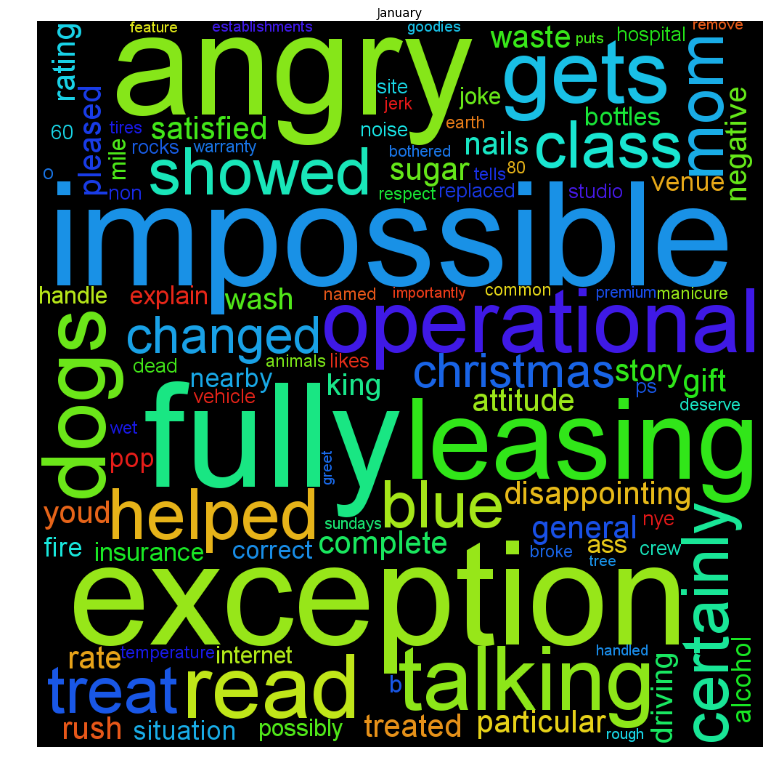

In [111]:
from os import path
from wordcloud import WordCloud
from pylab import rcParams
rcParams['figure.figsize'] = 13, 13 
# Generate a word cloud image
#FONT PATH MUST BE SET FOR DIFFERENT OS
wordcloud = WordCloud(font_path ="C://Windows/Fonts/arial.ttf", 
    max_words=100, height=1000 ,width=1000, max_font_size=200).generate_from_frequencies(wcounts["January"].items())

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.title("January")

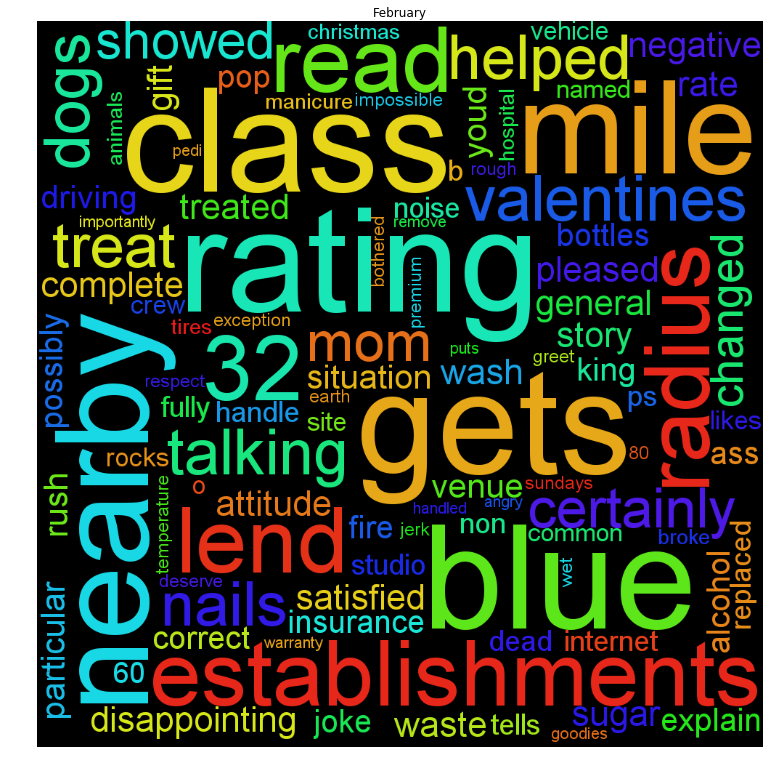

In [112]:
# Generate a word cloud image
#FONT PATH MUST BE SET FOR DIFFERENT OS
wordcloud = WordCloud(font_path ="C://Windows/Fonts/arial.ttf", 
    max_words=100, height=1000 ,width=1000, max_font_size=200).generate_from_frequencies(wcounts["February"].items())

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.title("February")

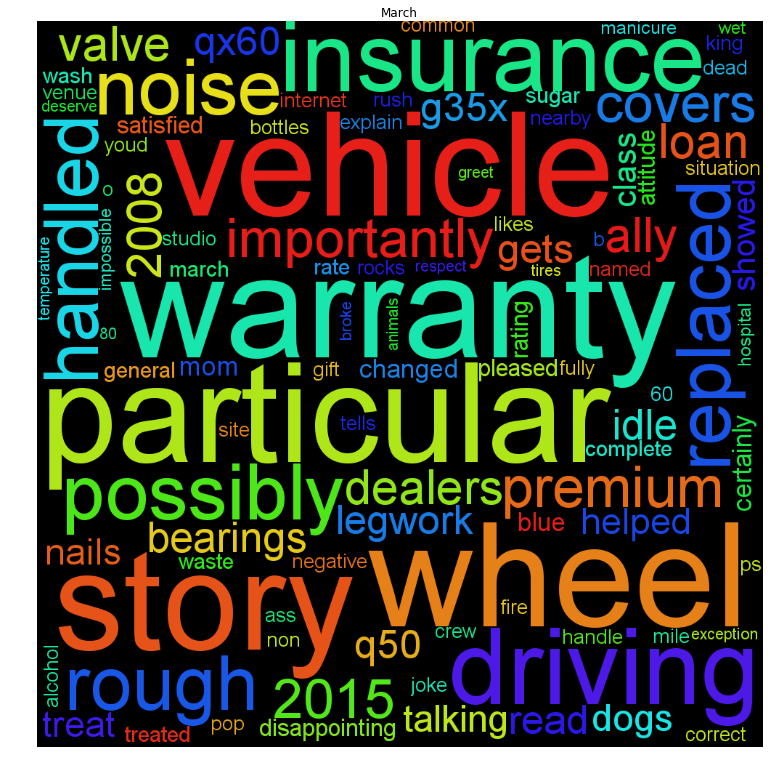

In [113]:
# Generate a word cloud image
#FONT PATH MUST BE SET FOR DIFFERENT OS
wordcloud = WordCloud(font_path ="C://Windows/Fonts/arial.ttf", 
    max_words=100, height=1000 ,width=1000, max_font_size=200).generate_from_frequencies(wcounts["March"].items())

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.title("March")

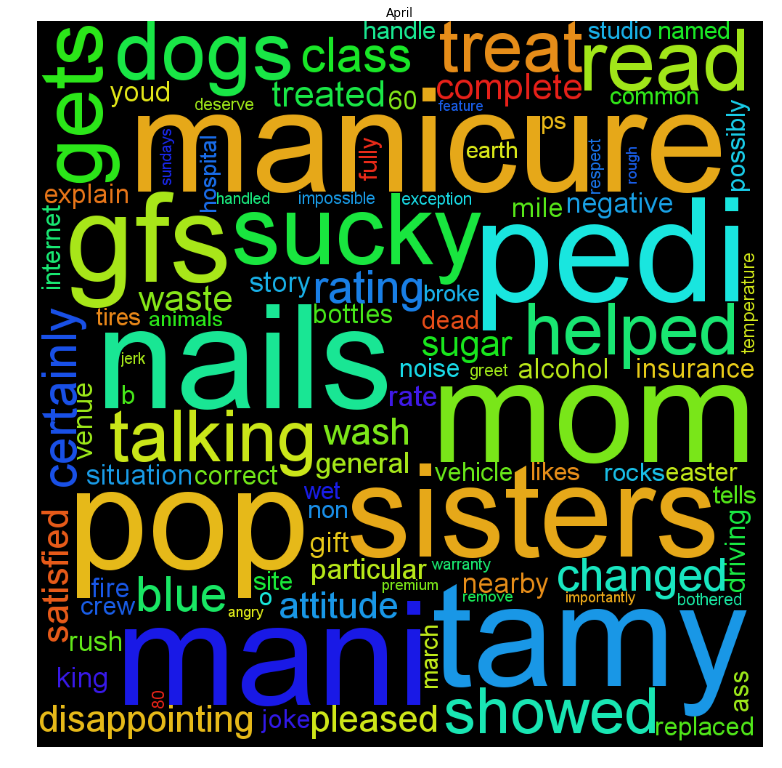

In [114]:
# Generate a word cloud image
#FONT PATH MUST BE SET FOR DIFFERENT OS
wordcloud = WordCloud(font_path ="C://Windows/Fonts/arial.ttf", 
    max_words=100, height=1000 ,width=1000, max_font_size=200).generate_from_frequencies(wcounts["April"].items())

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.title("April")

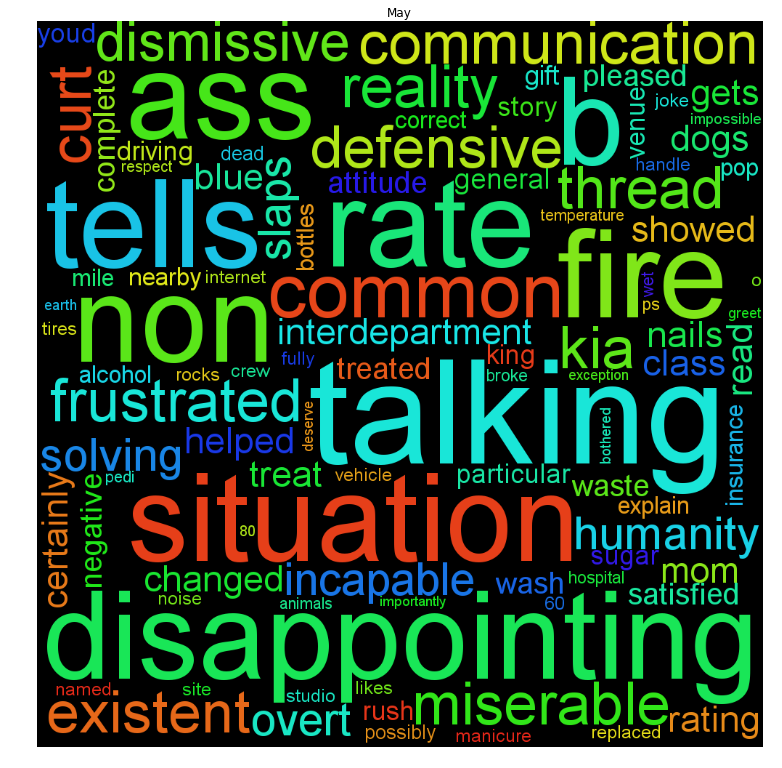

In [115]:
# Generate a word cloud image
#FONT PATH MUST BE SET FOR DIFFERENT OS
wordcloud = WordCloud(font_path ="C://Windows/Fonts/arial.ttf", 
    max_words=100, height=1000 ,width=1000, max_font_size=200).generate_from_frequencies(wcounts["May"].items())

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.title("May")

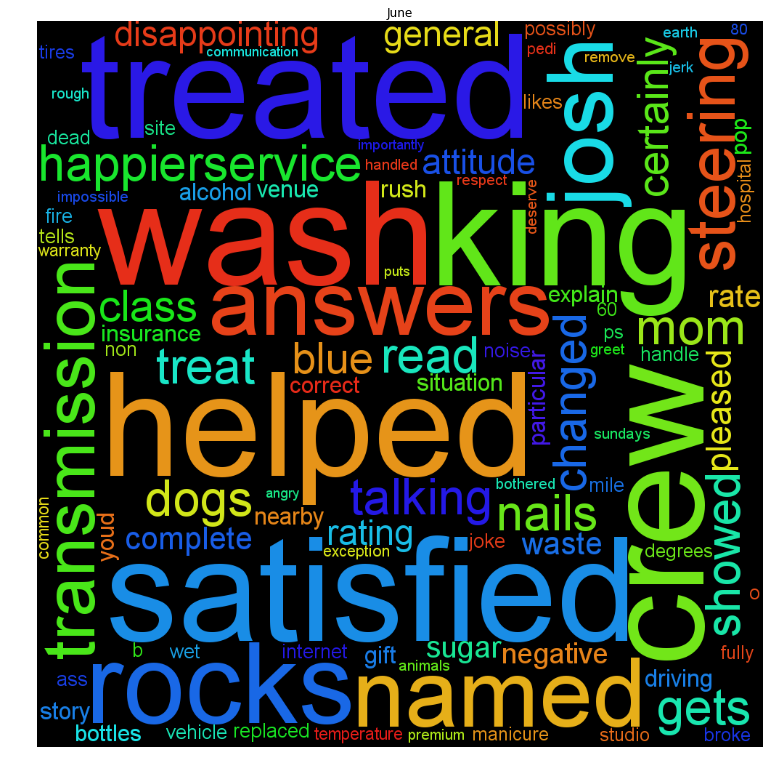

In [116]:
# Generate a word cloud image
#FONT PATH MUST BE SET FOR DIFFERENT OS
wordcloud = WordCloud(font_path ="C://Windows/Fonts/arial.ttf", 
    max_words=100, height=1000 ,width=1000, max_font_size=200).generate_from_frequencies(wcounts["June"].items())

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.title("June")

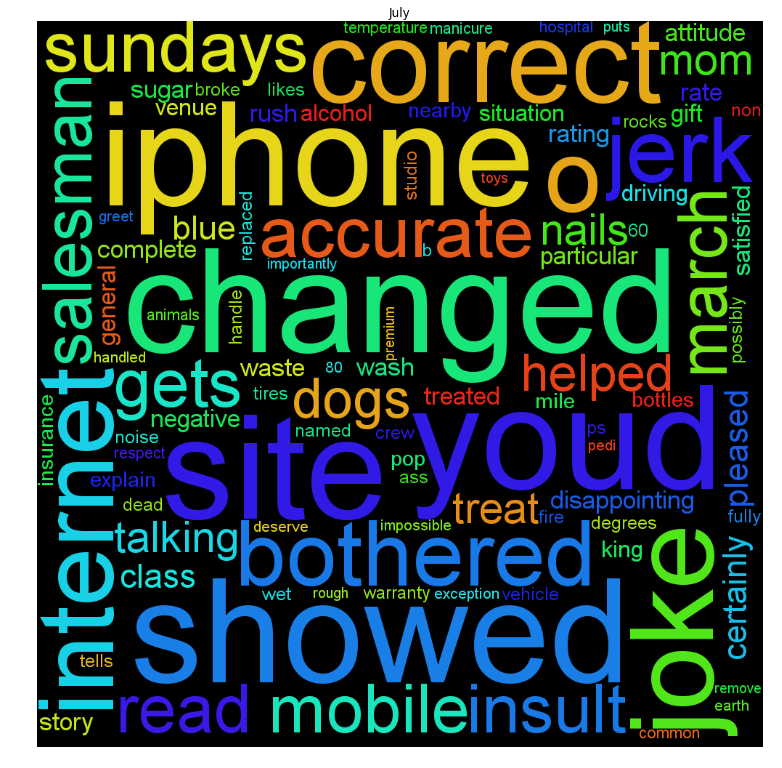

In [117]:
# Generate a word cloud image
#FONT PATH MUST BE SET FOR DIFFERENT OS
wordcloud = WordCloud(font_path ="C://Windows/Fonts/arial.ttf", 
    max_words=100, height=1000 ,width=1000, max_font_size=200).generate_from_frequencies(wcounts["July"].items())

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.title("July")

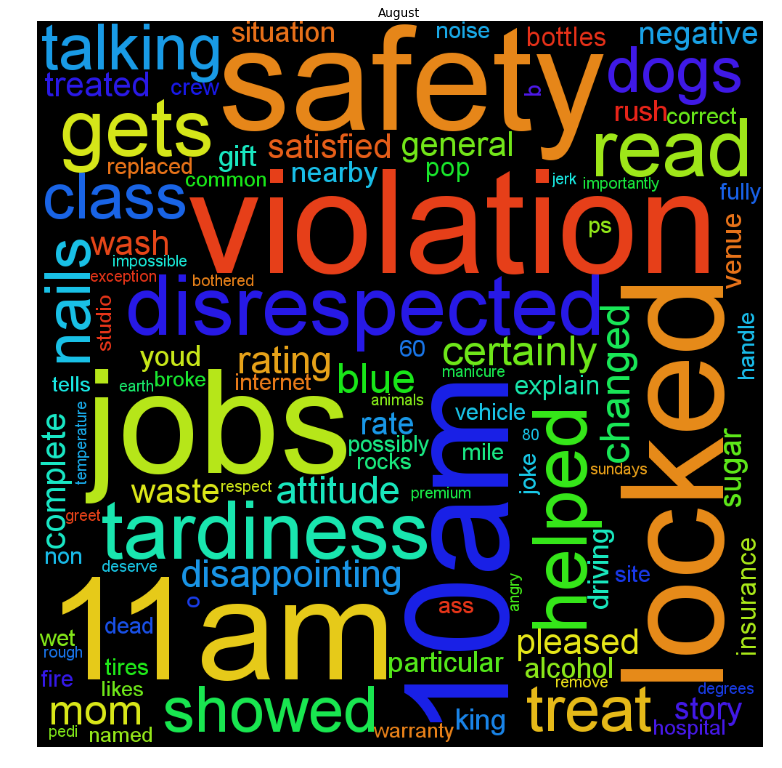

In [118]:
# Generate a word cloud image
#FONT PATH MUST BE SET FOR DIFFERENT OS
wordcloud = WordCloud(font_path ="C://Windows/Fonts/arial.ttf", 
    max_words=100, height=1000 ,width=1000, max_font_size=200).generate_from_frequencies(wcounts["August"].items())

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.title("August")

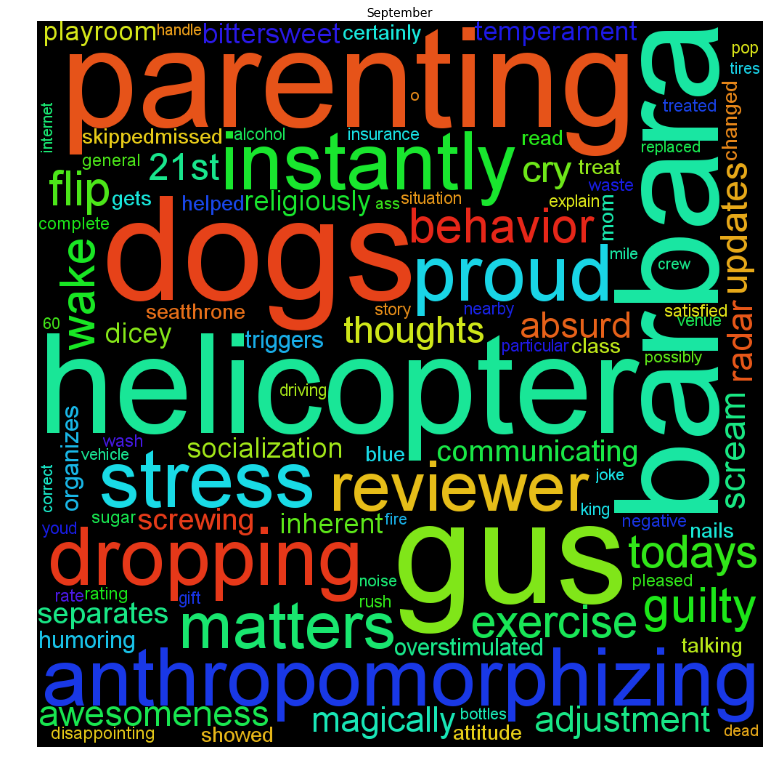

In [119]:
# Generate a word cloud image
#FONT PATH MUST BE SET FOR DIFFERENT OS
wordcloud = WordCloud(font_path ="C://Windows/Fonts/arial.ttf", 
    max_words=100, height=1000 ,width=1000, max_font_size=200).generate_from_frequencies(wcounts["September"].items())

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.title("September")

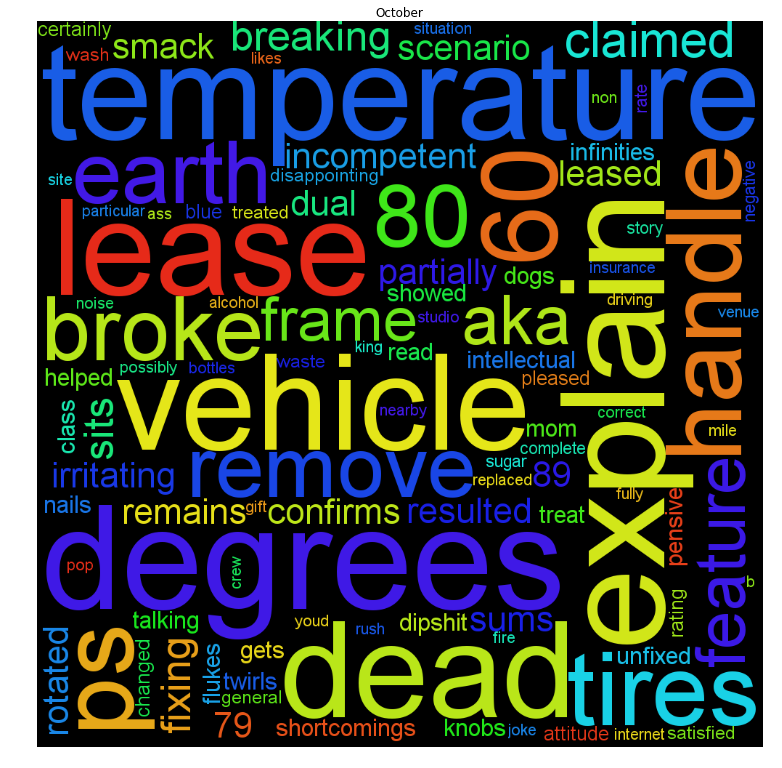

In [120]:
# Generate a word cloud image
#FONT PATH MUST BE SET FOR DIFFERENT OS
wordcloud = WordCloud(font_path ="C://Windows/Fonts/arial.ttf", 
    max_words=100, height=1000 ,width=1000, max_font_size=200).generate_from_frequencies(wcounts["October"].items())

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.title("October")

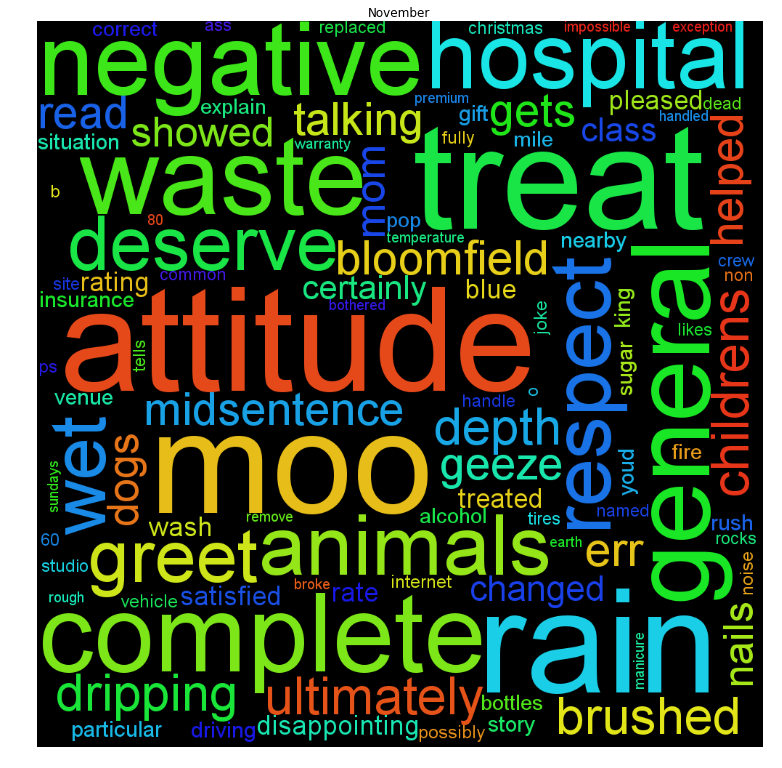

In [121]:
# Generate a word cloud image
#FONT PATH MUST BE SET FOR DIFFERENT OS
wordcloud = WordCloud(font_path ="C://Windows/Fonts/arial.ttf", 
    max_words=100, height=1000 ,width=1000, max_font_size=200).generate_from_frequencies(wcounts["November"].items())

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.title("November")

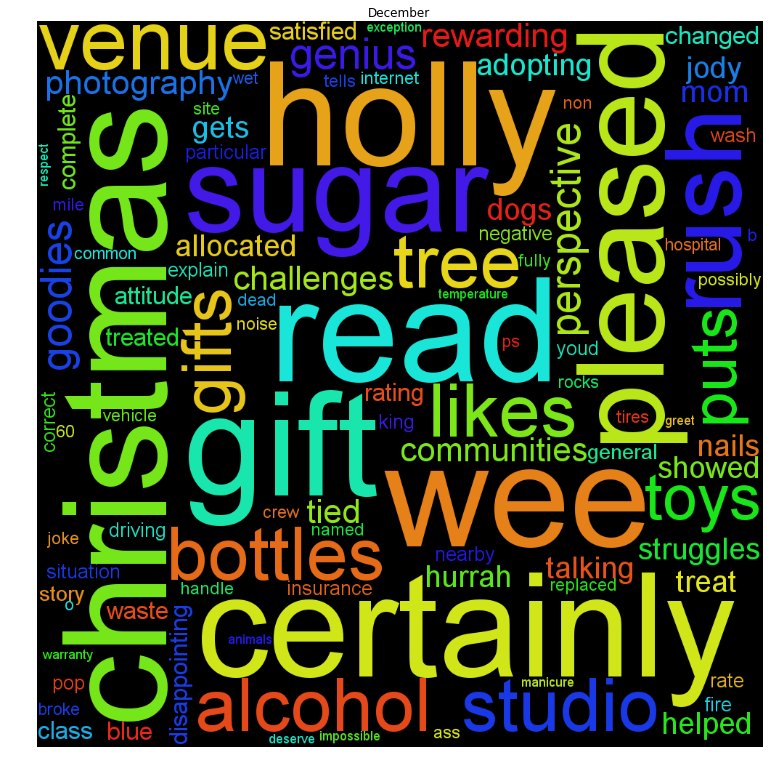

In [122]:
# Generate a word cloud image
#FONT PATH MUST BE SET FOR DIFFERENT OS
wordcloud = WordCloud(font_path ="C://Windows/Fonts/arial.ttf", 
    max_words=100, height=1000 ,width=1000, max_font_size=200).generate_from_frequencies(wcounts["December"].items())

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.title("December")